# Part I - (Prosper loans)
## by (Othniel)

## Introduction
> This is a dataset containing 114,937 loan applications and i will be looking at the following questions:-
  1. What factors affects the loan status of a loan?
  2. What factors affects the borrowers interest rate?


## Preliminary Wrangling


In [118]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


import requests
url= 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
response= requests.get(url)
file_name= 'loan data.csv'
with open (file_name , mode ='wb') as file:
    file.write(response.content)

In [119]:
loan_df = pd.read_csv('loan data.csv')
loan_df.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
40674,66E33534204271911500270,543114,2011-12-07 06:08:30.250000000,NaN,36,Completed,2012-10-20 00:00:00,0.15375,0.1254,0.1154,...,-50.11,0.00,0.00,0.00,0.0,1.0,0,0,0.0,112
47754,52923494494924817037E6D,475545,2010-09-14 15:03:22.690000000,NaN,36,Completed,2011-04-26 00:00:00,0.41355,0.3500,0.3400,...,-5.59,0.00,0.00,0.00,0.0,1.0,0,0,0.0,28
9510,67BD35963071846230EB74D,1061240,2013-12-08 20:41:55.190000000,NaN,36,Current,NaN,0.20524,0.1685,0.1585,...,-16.29,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
16868,9080355341206169059EBA2,620039,2012-08-03 09:42:41.987000000,NaN,36,Chargedoff,2013-10-20 00:00:00,0.35797,0.3177,0.3077,...,-29.35,-25.57,3429.04,3429.04,150.0,1.0,0,0,0.0,54
57014,FA5A3427427047514A614FA,371662,2008-07-22 16:30:55.183000000,C,36,Completed,2011-04-05 00:00:00,0.29334,0.2700,0.2600,...,-45.18,0.00,0.00,0.00,0.0,1.0,0,0,0.0,23


In [120]:
loan_df.shape

(113937, 81)

In [121]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [122]:
loan_df[['CreditGrade','Term','BorrowerRate','ProsperScore','Occupation','EmploymentStatus','EmploymentStatusDuration','LoanOriginalAmount','MonthlyLoanPayment']].sample(5)

,CreditGrade,Term,BorrowerRate,ProsperScore,Occupation,EmploymentStatus,EmploymentStatusDuration,LoanOriginalAmount,MonthlyLoanPayment
42218,NaN,12,0.1587,7.0,Accountant/CPA,Employed,13.0,4500,408.01
92945,NaN,36,0.1399,9.0,Skilled Labor,Employed,60.0,4000,136.69
64197,NaN,36,0.1314,7.0,Food Service,Employed,2.0,4000,135.05
72014,NaN,36,0.3500,4.0,Executive,Full-time,44.0,1900,85.95
92681,NaN,36,0.2859,4.0,Military Officer,Full-time,223.0,4000,166.73


In [123]:
loan_df[['LoanOriginalAmount','ProsperScore']].describe()

,LoanOriginalAmount,ProsperScore
count,113937.00000,84853.000000
mean,8337.01385,5.950067
std,6245.80058,2.376501
min,1000.00000,1.000000
25%,4000.00000,4.000000
50%,6500.00000,6.000000
75%,12000.00000,8.000000
max,35000.00000,11.000000


### What is the structure of your dataset?

> This dataset has 113,937 rows and 81 dataset

### What is/are the main feature(s) of interest in your dataset?

> The loan status and the borrower Rate

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features such as CreditGrade, Term, Borrower Rate, Occupation, employment Status and duration, loan original amount and prosper score.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


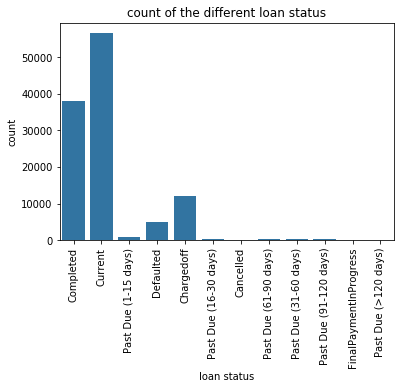

In [124]:
color=sb.color_palette()[0]
#get the count of the different loan status
sb.countplot(data=loan_df , x= 'LoanStatus', color=color);
def x_y_t(x,y,t):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
x_y_t('loan status','count','count of the different loan status')
plt.xticks(rotation=90);



the highest number of loans are currently running followed by loans that have been completed.

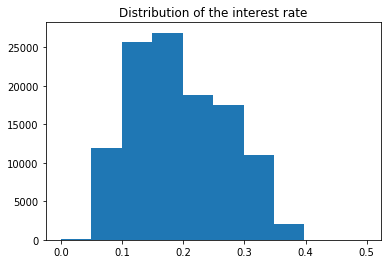

In [125]:
#plot the historgam of the interest rate
plt.hist(data=loan_df ,x='BorrowerRate');
def title(titl):
    plt.title(titl)
title('Distribution of the interest rate');

The distribution of the interest rate, is skewed to the right

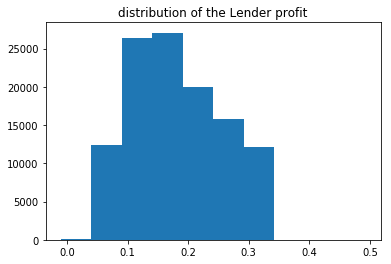

In [126]:
#plot the histogram of the Lender's yield
plt.hist(data=loan_df, x= 'LenderYield');
title('distribution of the Lender profit');

The distribution of the lender's profit is also skewed to the right

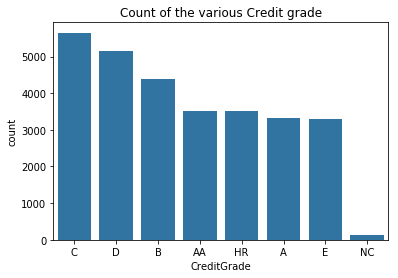

In [127]:
#plot the barchart of the various credit grade
order=loan_df.CreditGrade.value_counts().index
color=sb.color_palette()[0]
sb.countplot(data= loan_df, x='CreditGrade', order=order, color=color);
title('Count of the various Credit grade');

Over 5000 of borrowers have a credit grade of C

In [128]:
loan_df.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

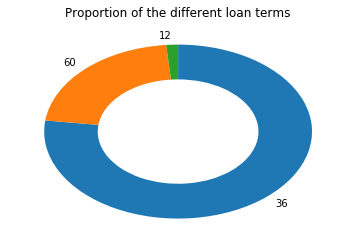

In [129]:
# Pie chart showing the different loan terms
Terms= loan_df['Term'].value_counts()
plt.pie(Terms, labels= Terms.index,startangle=90, counterclock=False, wedgeprops={'width':0.4});
title('Proportion of the different loan terms');

Majority of the loans run for 36 months



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [130]:
status_list=loan_df.LoanStatus.value_counts().index.tolist()

In [131]:
rating_list=['AA','A','B','C','D','E','HR']
rating_list

['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

In [132]:
ProsperRating= pd.api.types.CategoricalDtype(ordered=True,categories=rating_list)
loan_df['ProsperRating (Alpha)']=loan_df['ProsperRating (Alpha)'].astype(ProsperRating)

In [133]:
loanStatus = pd.api.types.CategoricalDtype(ordered=True, categories= status_list)
loan_df['LoanStatus']= loan_df['LoanStatus'].astype(loanStatus);

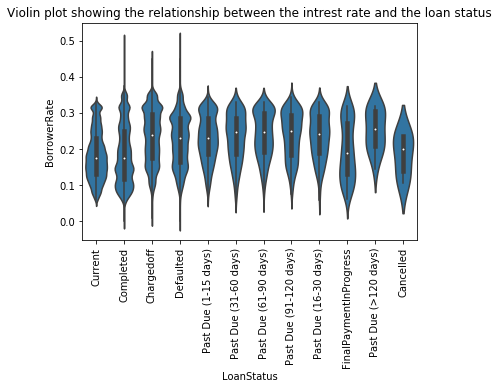

In [134]:
color=sb.color_palette()[0]
# violinplot showing the relationship between the interest rate and the loan status
sb.violinplot(data=loan_df, x= 'LoanStatus',y='BorrowerRate',color=color);
plt.xticks(rotation=90);
title('Violin plot showing the relationship between the intrest rate and the loan status')

presence of outliers for loans that have been completed, charged off and defaulted when compared with the interest rate

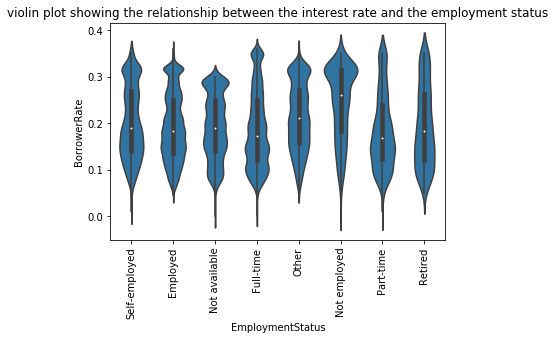

In [135]:
# violinplot showing the relationship between the employment status and the interest rate
sb.violinplot(data=loan_df, x= 'EmploymentStatus',y='BorrowerRate', color=color);
plt.xticks(rotation=90);
title('violin plot showing the relationship between the interest rate and the employment status');

Unemployed customers have low interest rate

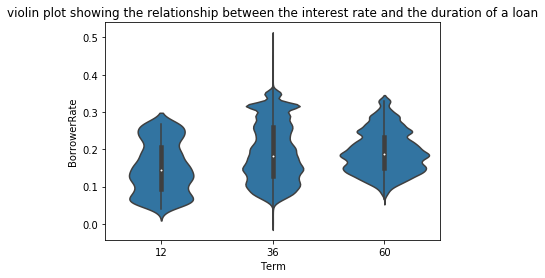

In [136]:
# plot a violin plot to see the relationship between the terms and interest rate
sb.violinplot(data=loan_df,x='Term',y='BorrowerRate',color=color);
title('violin plot showing the relationship between the interest rate and the duration of a loan')

loans for 36month period have outliers

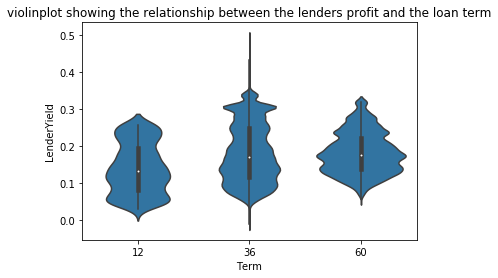

In [137]:
#i will use a violin plot to show the correlation between the lender's profit and the loan duration
sb.violinplot(data=loan_df, x='Term',y='LenderYield',color=color);
title('violinplot showing the relationship between the lenders profit and the loan term');

### observation
i observed that loans of 36 month has high profit

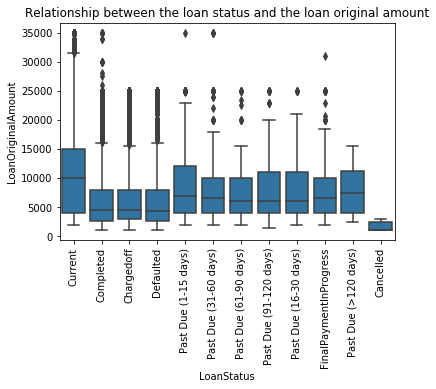

In [138]:
# boxplot to show the relationship between the loan status and amount
sb.boxplot(data = loan_df, x= 'LoanStatus', y='LoanOriginalAmount',color=color);
plt.xticks(rotation=90);
title('Relationship between the loan status and the loan original amount');

loan Amounts with high values have been completed

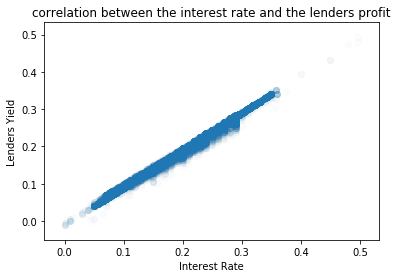

In [149]:
#scatterplot to show the correlation
plt.scatter(data= loan_df, x='BorrowerRate', y='LenderYield', alpha=1/50);    
x_y_t('Interest Rate','Lenders Yield','correlation between the interest rate and the lenders profit')


#### observation
i observed a strong positive trend between the interest rate and the profit meaning, the more the interest rate, the more money is made

In [140]:
loan_df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [141]:
loan_df['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

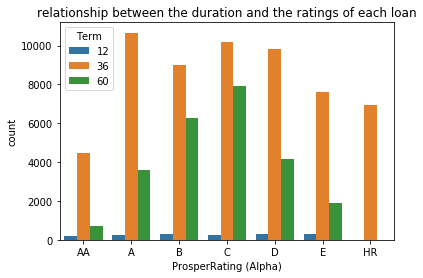

In [142]:
#i make use of seaborns countplot method
sb.countplot(data=loan_df, x= 'ProsperRating (Alpha)',hue = 'Term');
title('relationship between the duration and the ratings of each loan');

### observation

i observed that most borrowers have a prosper rating of C

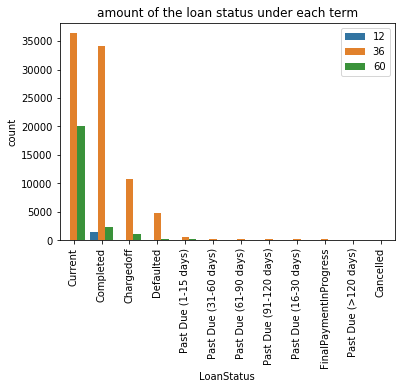

In [143]:
# i will use the seaborn countplot method
sb.countplot(data=loan_df, x='LoanStatus',hue='Term');
plt.xticks(rotation=90);
plt.legend(loc='upper right');
title('amount of the loan status under each term');

### observation
most of the loans are either running or completed

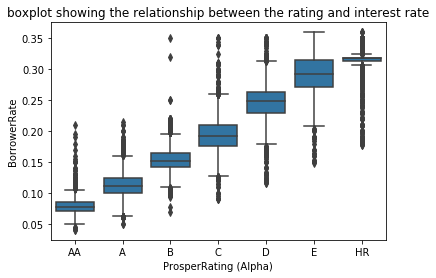

In [144]:
# make use of a boxplot
sb.boxplot(data=loan_df, x='ProsperRating (Alpha)',y='BorrowerRate' ,color=color);
title('boxplot showing the relationship between the rating and interest rate')

### observation
borrowers with rating C has alot of high interest rate

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Loans that have been completed, Charged off and defaulted have outliers meaning alot of these loans had high interest rate

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Loans that ran for 36months had individual loans that had high interest rate

presence of outliers for loans that have been completed, charged off and defaulted when compared with the interest rate

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

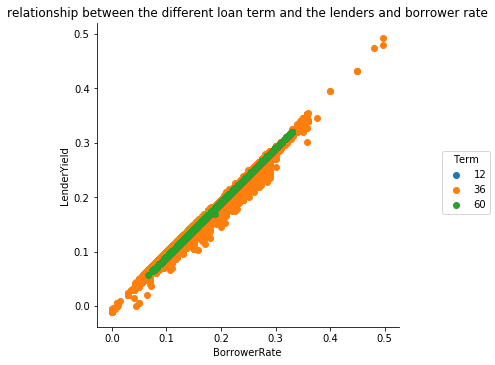

In [145]:
#FacetGrid to show the multivariate relationship
g=sb.FacetGrid(data=loan_df,hue='Term',size=5)
g.map(plt.scatter,'BorrowerRate','LenderYield')
g.add_legend(loc='upper right');
title('relationship between the different loan term and the lenders and borrower rate');

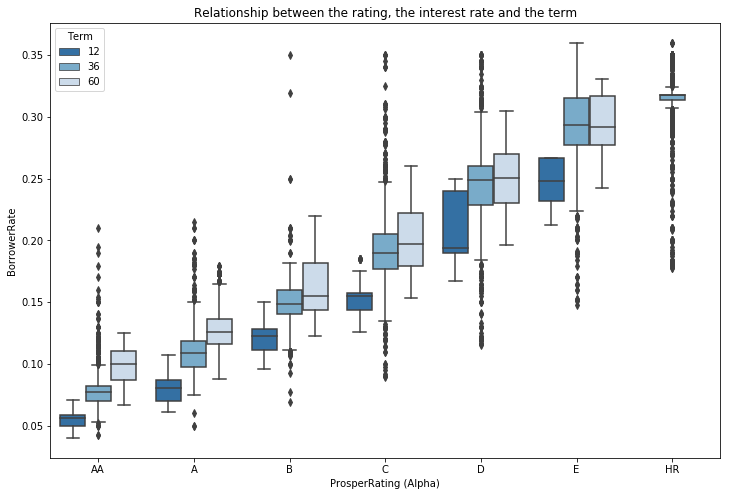

In [146]:
figu= plt.figure(figsize=[12,8])
sb.boxplot(data=loan_df, x='ProsperRating (Alpha)',y = 'BorrowerRate',hue='Term', palette='Blues_r');
title('Relationship between the rating, the interest rate and the term')

### observation
strong confirmation that most borrowers had a rating of C

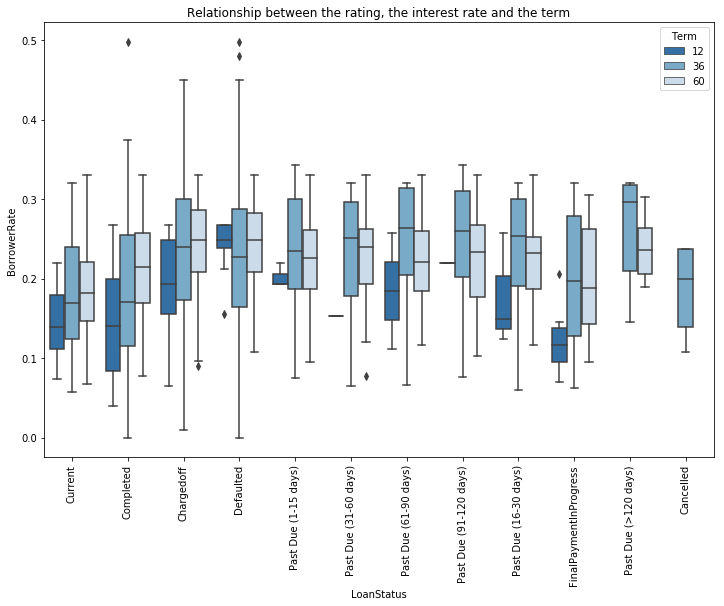

In [147]:
figu= plt.figure(figsize=[12,8])
sb.boxplot(data=loan_df, x='LoanStatus',y = 'BorrowerRate',hue='Term', palette='Blues_r');
title('Relationship between the rating, the interest rate and the term')
plt.xticks(rotation=90);

### observation
further confirmation that most of the loans were 36month termed

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Even though loans of 36 month had high interest rates, loans of 60months had a more positive correlation than those of 36months

### Were there any interesting or surprising interactions between features?

> Loans of 12 months were mostly non-existent

# Conclusions
> Prosper loan company does a good job as most of their loans have been completed


> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

